In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd

train_df = pd.read_csv("/content/sign_mnist_test.csv.zip")
test_df = pd.read_csv("/content/sign_mnist_test.csv.zip")

y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [3]:
!pip install tensorflow
import tensorflow as tf

# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [5]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 25 , validation_data = (x_test, y_test))

model.save('smnist.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

Epoch 1/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9116 - val_loss: 0.3069
Epoch 2/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9994 - val_loss: 0.0011
Epoch 3/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9926 - loss: 0.0213 - val_accuracy: 0.9948 - val_loss: 0.0172
Epoch 4/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9938 - loss: 0.0155 - val_accuracy: 0.9997 - val_loss: 0.0014
Epoch 5/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9961 - loss: 0.0107 - val_accuracy: 0.9979 - val_loss: 0.0065
Epoch 6/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9982 - val_loss: 0.0048
Epoch 7/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9934 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 4.5437e-04
Epoch 8/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9948 - loss: 0.0124 - val_accuracy: 0.97

In [67]:
# Evaluate the model on your test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9138 - loss: 0.3519
Test Accuracy: 91.24%


In [49]:
pip install mediapipe

In [50]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
import time

In [51]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            const video = document.createElement('video');
            video.srcObject = stream;
            video.play();
            div.appendChild(video);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach((track) => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [63]:
model = load_model('smnist.h5')

mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils

#cap = take_photo()
#frame = cv2.imread(cap)
#h, w, c = frame.shape

analysisframe = ''
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [54]:
from google.colab.patches import cv2_imshow

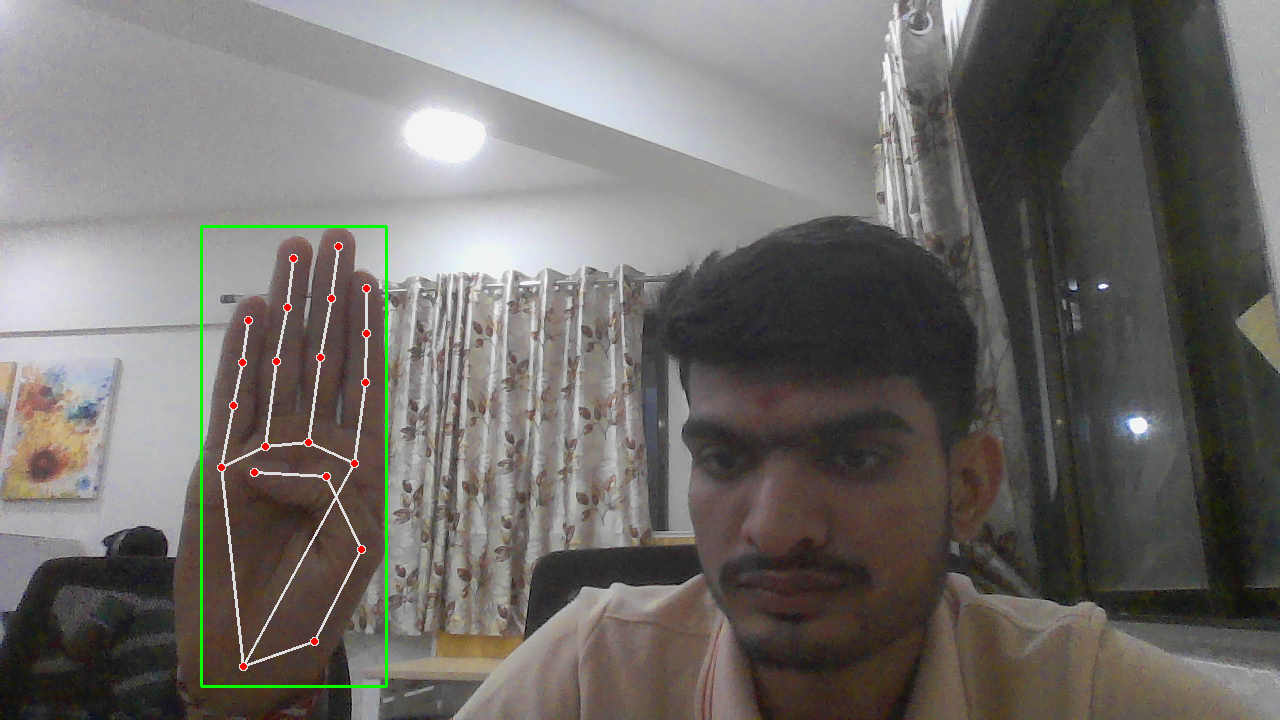

Processed 1 frames. Exiting...


In [55]:
import cv2
from google.colab.patches import cv2_imshow

# Replace 'video.mp4' with the path to your video file or use a valid video source
video_path = '/content/WIN_20250110_23_59_44_Pro.mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0
max_frames = 1  # Adjust this value as needed

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks
    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = frame.shape[1]  # Width of the frame
            y_min = frame.shape[0]  # Height of the frame
            for lm in handLMs.landmark:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)
    cv2_imshow(frame)

    frame_count += 1  # Increment frame count

print("Processed", frame_count, "frames. Exiting...")
cap.release()
cv2.destroyAllWindows()

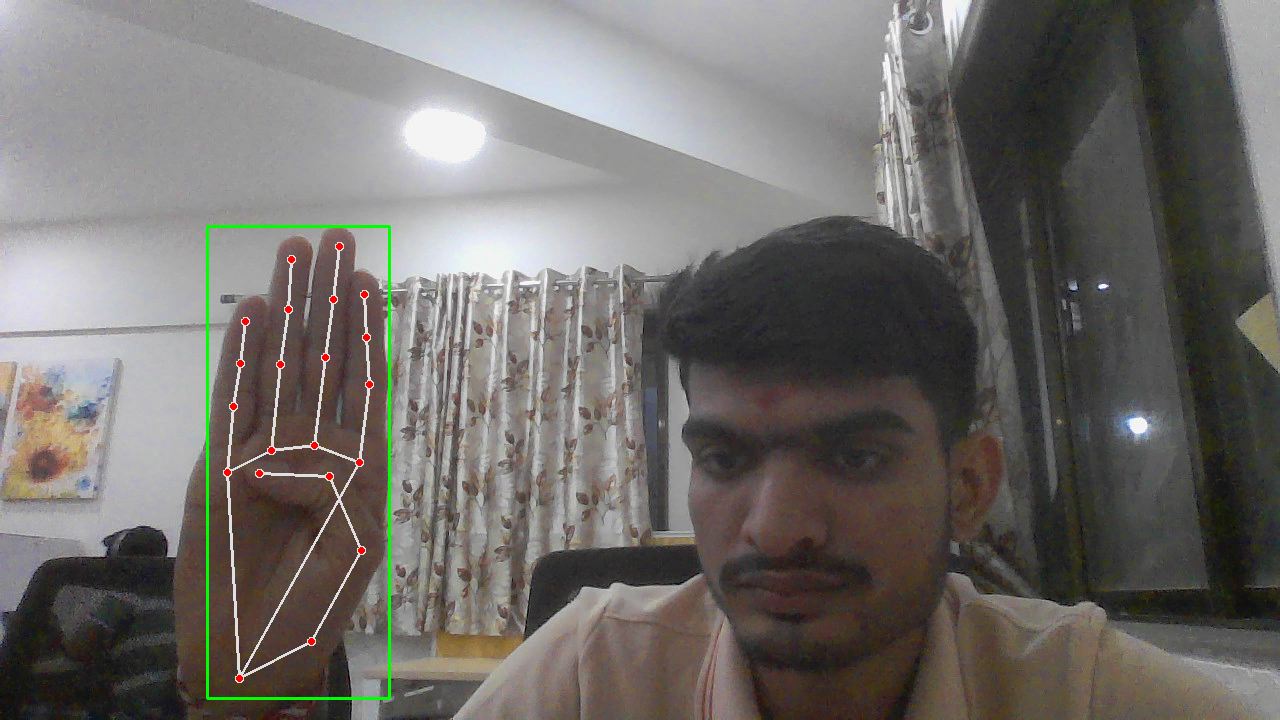

Processed 1 frames. Exiting...


In [56]:
import cv2
from google.colab.patches import cv2_imshow

# Replace 'video.mp4' with the path to your video file or use a valid video source
video_path = '/content/WIN_20250110_23_59_44_Pro.mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0
max_frames = 1  # Adjust this value as needed

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks
    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = frame.shape[1]  # Width of the frame
            y_min = frame.shape[0]  # Height of the frame
            for lm in handLMs.landmark:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)
    cv2_imshow(frame)

    frame_count += 1  # Increment frame count

print("Processed", frame_count, "frames. Exiting...")
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Predicted Character: A


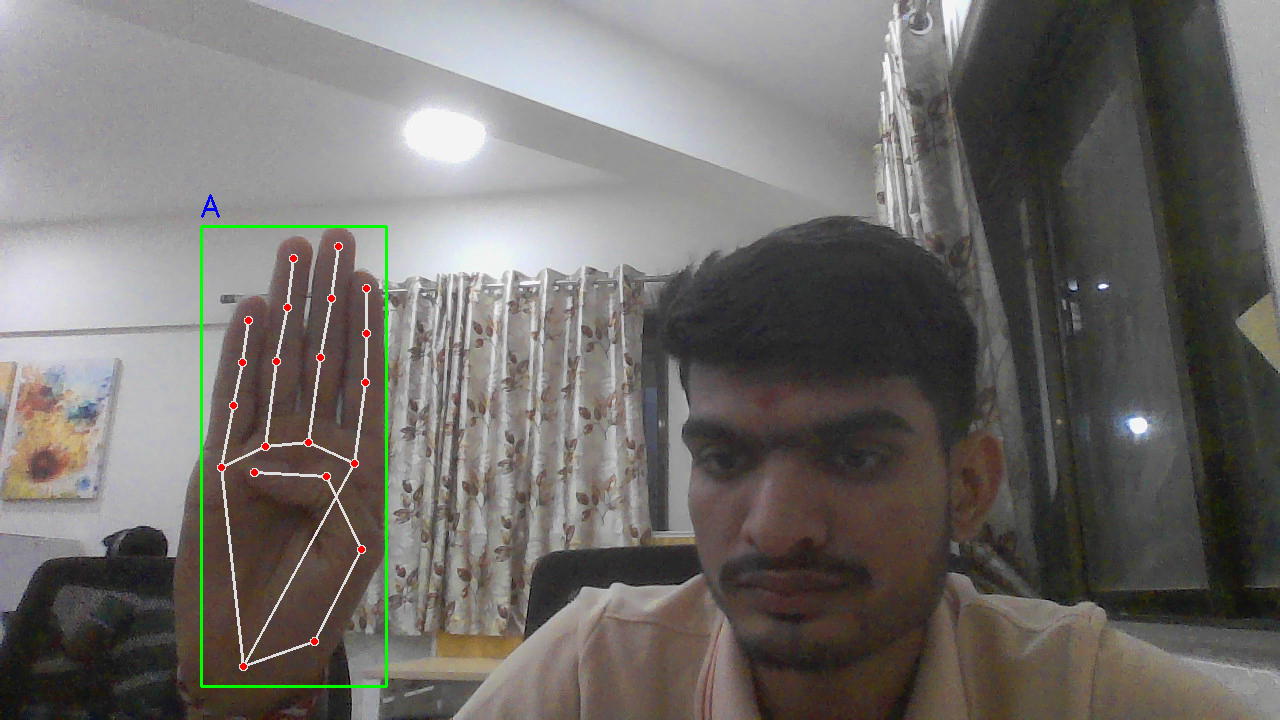

Processed 1 frames. Exiting...


In [68]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming `model` is your trained model and `letterpred` maps indices to characters

# Load video
video_path = '/content/WIN_20250110_23_59_44_Pro.mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0
max_frames = 1  # Adjust as needed

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks

    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = frame.shape[1]  # Width of the frame
            y_min = frame.shape[0]  # Height of the frame
            for lm in handLMs.landmark:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20

            # Crop and preprocess the hand region
            hand_roi = frame[y_min:y_max, x_min:x_max]
            hand_roi = cv2.cvtColor(hand_roi, cv2.COLOR_BGR2GRAY)
            hand_roi = cv2.resize(hand_roi, (28, 28))  # Resize to model input size
            hand_roi = hand_roi / 255.0  # Normalize pixel values
            hand_roi = hand_roi.reshape(-1, 28, 28, 1)  # Reshape for model input

            # Predict the sign language
            prediction = model.predict(hand_roi)
            pred_index = np.argmax(prediction)  # Get the index of the highest probability
            predicted_char = letterpred[pred_index]  # Map index to character

            print("Predicted Character:", predicted_char)
            cv2.putText(frame, predicted_char, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            # Draw rectangle and landmarks
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)

    # Show the frame
    cv2_imshow(frame)
    frame_count += 1  # Increment frame count

print("Processed", frame_count, "frames. Exiting...")
cap.release()
cv2.destroyAllWindows()
